### Load raw data set and visualize angle distribution

Num drive log steering angles: 8036
Min drive log steering angle: -0.9426954
Max drive log steering angle: 1.0


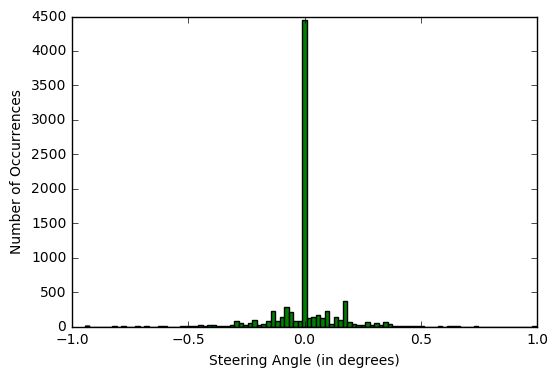

In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

drive_log_steering_angles = [] #steering angles

#load the driving log steering angle data
with open('driving_log.csv') as file_handle:
    #view file rows as a dictionary (based on header row)
    dict_reader = csv.DictReader(file_handle)
    #get current row as dictionary
    for cur_dict_line in dict_reader:
        #append steering angle from cur_row
        drive_log_steering_angles.append(float(cur_dict_line['steering']))
        
#convert to array
drive_log_steering_angles = np.array(drive_log_steering_angles)
print("Num drive log steering angles:", len(drive_log_steering_angles))
print("Min drive log steering angle:", min(drive_log_steering_angles))
print("Max drive log steering angle:", max(drive_log_steering_angles))

num_bins = 100
plt.hist(drive_log_steering_angles, num_bins, facecolor='g')
plt.xlabel('Steering Angle (in degrees)')
plt.ylabel('Number of Occurrences')
plt.show()

### Visualize images from the drive log

Len drive log examples: 8036


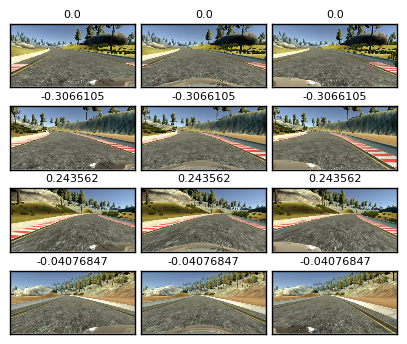

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

drive_log_examples = [] #one example per row (left, center, right, steering)

#load the driving log steering angle data
with open('driving_log.csv') as file_handle:
    #view file rows as a dictionary (based on header row)
    dict_reader = csv.DictReader(file_handle)
    #get current row as dictionary
    for cur_dict_line in dict_reader:
        #append [left, center, right, steering]
        drive_log_examples.append([(cur_dict_line['left']).strip(), (cur_dict_line['center']).strip(), \
                                  (cur_dict_line['right']).strip(), float(cur_dict_line['steering'])])
        
#convert to array
drive_log_examples = np.array(drive_log_examples)
print("Len drive log examples:", len(drive_log_examples))

#return a list of lists contianing subplot objects handles (should return 4 rows, each row containing 3 subplot object handles)
fig, subplot_handle_list = plt.subplots(4, 3, figsize=(5, 4), subplot_kw={'xticks': [], 'yticks': []}, \
                                        sharex=True, sharey=True)
#adjust spacing
fig.subplots_adjust(hspace=0.3, wspace=0.05)

#print out 3 random image sets (left, center, right)
for i in range(0, subplot_handle_list.shape[0]):
    #randomly select an index within drive_log_examples
    random_index = np.random.randint(len(drive_log_examples))
    #loop and display the left, center, and right images for the randomly selected row
    for j in range(0, 3):
        #display the image
        subplot_handle_list[i][j].imshow(mpimg.imread(drive_log_examples[random_index][j]))
        #set the title (steering angle)
        subplot_handle_list[i][j].set_title(drive_log_examples[random_index][3], fontsize=8)
#show the plot
plt.show()

### Load raw data set, folding in left, center, and right image paths

Num drive log image paths: 24108
Num drive log steering angles: 24108
Min drive log steering angle: -1.16409132207
Max drive log steering angle: 1.2150560084


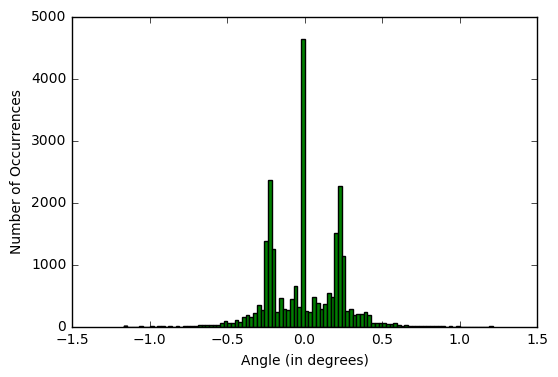

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

drive_log_image_paths = [] #file paths (left, center, and right images are all folded in to this vector of image paths)
drive_log_steering_angles = [] #steering angle associated with drive_log_image_paths
angle_offset = 0.25
cur_steering_angle = 0.0

#load the driving log data (folding in the left, center, and right images into one vector)
with open('driving_log.csv') as file_handle:
    #view file rows as a dictionary (based on header row)
    dict_reader = csv.DictReader(file_handle)
    #get current row as dictionary
    for cur_dict_line in dict_reader:
        #get steering angle from cur_row
        cur_steering_angle = float(cur_dict_line['steering']) 
        #add the left, center, and right image paths from cur_row 
        drive_log_image_paths.append((cur_dict_line['left']).strip())
        drive_log_image_paths.append((cur_dict_line['center']).strip())
        drive_log_image_paths.append((cur_dict_line['right']).strip())
        #append steering angle + angle offset (for left)
        drive_log_steering_angles.append(cur_steering_angle + np.random.uniform(low=0.2, high=angle_offset))
        #append center steering angle (no change)
        drive_log_steering_angles.append(cur_steering_angle)
        #append steering angle - angle offset (for right)
        drive_log_steering_angles.append(cur_steering_angle - np.random.uniform(low=0.2, high=angle_offset))
        
#convert to array
drive_log_steering_angles = np.array(drive_log_steering_angles)
drive_log_image_paths = np.array(drive_log_image_paths)
print("Num drive log image paths:", len(drive_log_image_paths))
print("Num drive log steering angles:", len(drive_log_steering_angles))
print("Min drive log steering angle:", min(drive_log_steering_angles))
print("Max drive log steering angle:", max(drive_log_steering_angles))

#bins = np.linspace(-1, 1, 100)
num_bins = 100

#plt.hist(steering_angles, num_bins, normed=1, facecolor='g', alpha=0.75)
plt.hist(drive_log_steering_angles, num_bins, facecolor='g')
plt.xlabel('Angle (in degrees)')
plt.ylabel('Number of Occurrences')
plt.show()

### Get rid of zero degree angles

Num drive log image paths: 11025
Num drive log steering angles: 11025
Min drive log steering angle: -1.18403625678
Max drive log steering angle: 1.24423246256


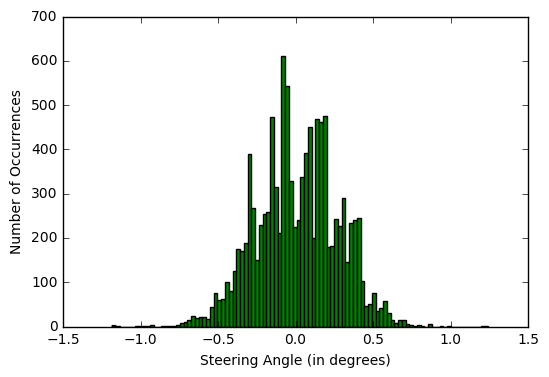

In [20]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

drive_log_image_paths = [] #file paths (left, center, and right images are all folded in to this vector of image paths)
drive_log_steering_angles = [] #steering angle associated with drive_log_image_paths
angle_offset = 0.25
cur_steering_angle = 0.0

#load the driving log data (folding in the left, center, and right images into one vector)
with open('driving_log.csv') as file_handle:
    #view file rows as a dictionary (based on header row)
    dict_reader = csv.DictReader(file_handle)
    #get current row as dictionary
    for cur_dict_line in dict_reader:
        #get steering angle from cur_row
        cur_steering_angle = float(cur_dict_line['steering']) 
        #get rid of zero degree angles
        if (cur_steering_angle != 0):
            #add the left, center, and right image paths from cur_row 
            drive_log_image_paths.append((cur_dict_line['left']).strip())
            drive_log_image_paths.append((cur_dict_line['center']).strip())
            drive_log_image_paths.append((cur_dict_line['right']).strip())
            #append steering angle + angle offset (for left)
            drive_log_steering_angles.append(cur_steering_angle + np.random.uniform(low=0.2, high=angle_offset))
            #append center steering angle (no change)
            drive_log_steering_angles.append(cur_steering_angle)
            #append steering angle - angle offset (for right)
            drive_log_steering_angles.append(cur_steering_angle - np.random.uniform(low=0.2, high=angle_offset))
        
#convert to array
drive_log_steering_angles = np.array(drive_log_steering_angles)
drive_log_image_paths = np.array(drive_log_image_paths)
print("Num drive log image paths:", len(drive_log_image_paths))
print("Num drive log steering angles:", len(drive_log_steering_angles))
print("Min drive log steering angle:", min(drive_log_steering_angles))
print("Max drive log steering angle:", max(drive_log_steering_angles))

#bins = np.linspace(-1, 1, 100)
num_bins = 100

#plt.hist(steering_angles, num_bins, normed=1, facecolor='g', alpha=0.75)
#y = filter(lambda x: -1 >= x >= 1, drive_log_steering_angles)

### UNCOMMENT TO FILTER ###
#filtered_drive_log_steering_angles = [x for x in drive_log_steering_angles if -1 <= x <= 1]
#print("Num filtered drive log steering angles:", len(filtered_drive_log_steering_angles))

#compute mean
#mean = np.mean(filtered_drive_log_steering_angles)
#center the data (based on subtraction of the mean)
#filtered_drive_log_steering_angles -= mean
#compute standard deviation of centered data
#stddev = np.std(filtered_drive_log_steering_angles)
#normalize the data (based on division of the std dev)
#filtered_drive_log_steering_angles /= stddev

#plt.hist(filtered_drive_log_steering_angles, num_bins, facecolor='g')
plt.hist(drive_log_steering_angles, num_bins, facecolor='g')
plt.xlabel('Steering Angle (in degrees)')
plt.ylabel('Number of Occurrences')
plt.show()

In [3]:
#zip lists
combined_lists = list(zip(drive_log_image_paths, drive_log_steering_angles))
print(len(combined_lists))

### UNCOMMENT TO FILTER ###
#filter angles greater than -1 and 1
#filtered_combined_lists = [x for x in combined_lists if -1 <= x[1] <= 1]
#print(len(filtered_combined_lists))

#unzip lists
#separated_lists = list(zip(*filtered_combined_lists))
separated_lists = list(zip(*combined_lists))
#cell 0 is the first list
drive_log_image_paths = np.array(separated_lists[0])
#cell 1 is the first list
drive_log_steering_angles = np.array(separated_lists[1])
print("Num drive log image paths:", len(drive_log_image_paths))
print("Num drive log steering angles:", len(drive_log_steering_angles))

11025
Num drive log image paths: 11025
Num drive log steering angles: 11025


In [2]:
from sklearn.model_selection import train_test_split

#carve out a portion of the training set to use for model validation
X_train, X_validation, y_train, y_validation = train_test_split(drive_log_image_paths, drive_log_steering_angles, \
                                                                test_size=0.2, random_state=0)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)

X_train shape:  (8820,)
y_train shape:  (8820,)
X_validation shape:  (2205,)
y_validation shape:  (2205,)


In [4]:
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import random
import cv2

#test function for visualizing generator data
def display_generator_data(X_batch, y_batch, display_message):
    assert((len(X_batch) == 12) and (len(y_batch) == 12)), "This function expects a batch size of 12."
    print(display_message)
    #return a list of lists contianing subplot objects handles (should return 4 rows, 
    #each row containing 3 subplot object handles)
    fig, subplot_handle_list = plt.subplots(4, 3, figsize=(5, 4), subplot_kw={'xticks': [], 'yticks': []}, \
                                            sharex=True, sharey=True)
    #adjust spacing
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    #flatten the subplot_handle_list and zip it with the images and labels so they can be extracted together and shown
    for cur_subplot_handle, image, label in zip(subplot_handle_list.flat, X_batch, y_batch):
        cur_subplot_handle.imshow(image)
        cur_subplot_handle.set_title(label, fontsize=8)
    #show the plot
    plt.show()

#rotate training example
def generate_rotation_matrix(image, steering_angle):
    #determine center point of source (training_example) --- used for center of rotation
    object_center_point = ((image.shape[1] / 2), (image.shape[0] / 2))
    #keep original scale of image
    object_scale = 1
    #randomly select an angle within a uniform distribution (rotation-factor, negative is clock-wise)
    object_rotation_angle = np.random.uniform(low=-5, high=5)
    #adjust steering angle based on x translation (invert sign of result given negative rotation is clock-wise)
    steering_angle += -(object_rotation_angle * 0.1)
    #return rotation matrix based on above values
    return (cv2.getRotationMatrix2D(object_center_point, object_rotation_angle, object_scale), steering_angle)   
    
#translate (change position of) training example
#translation matrix found here: http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
def generate_translation_matrix(image, steering_angle):
    #randomly translate x
    translated_x = np.random.uniform(low=-15, high=15)
    #adjust steering angle based on x translation
    steering_angle += translated_x * 0.005
    #randomly translate y
    translated_y = np.random.uniform(low=-15, high=15)
    #return translation matrix based on above values
    return (np.float32([[1, 0, translated_x],[0, 1, translated_y]]), steering_angle)

#perform brightness adjustment (brighten or darken)
def perform_brightness_adjustment(image, steering_angle):
    #convert RGB to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #randomly adjust V channel
    hsv[:,:,2] = hsv[:, :, 2] * np.random.uniform(low=0.2, high=1.0)
    #convert back to RGB and return (steering angle is unaltered)
    return (cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), steering_angle)

#randomly rotate object (within specified matrix bounds)
def perform_rotation(image, steering_angle):
    #get rotation matrix along with adjusted steering angle
    object_transform_matrix, steering_angle = generate_rotation_matrix(image, steering_angle)
    #return randomly rotated image with adjusted steering angle
    return (cv2.warpAffine(image, object_transform_matrix, (image.shape[1], image.shape[0])), steering_angle)

#perform y-axis flip
def perform_y_axis_flip(image, steering_angle):
    #return y-axis flipped image and flipped steering angle
    return (np.fliplr(image), -steering_angle)

#randomly translate object (within specified matrix bounds)
def perform_translation(image, steering_angle):
    #get tanslation matrix along with adjusted steering angle
    object_transform_matrix, steering_angle = generate_translation_matrix(image, steering_angle)
    #return randomly translated image with adjusted steering angle
    return (cv2.warpAffine(image, object_transform_matrix, (image.shape[1], image.shape[0])), steering_angle)

#generate a synthetic example from the supplied training example
def generate_synthetic_training_example(image, steering_angle):
    #list of transformation functions available
    #transformation_functions = [perform_translation, perform_brightness_adjustment, perform_y_axis_flip, perform_rotation]
    transformation_functions = [perform_translation, perform_brightness_adjustment, perform_y_axis_flip]
    #choose the number of transformations to perform at random (between 1 and 3)
    num_transformations_to_perform = random.randint(1, len(transformation_functions))
    #perform the number of transformations chosen
    for _ in range(0, num_transformations_to_perform):
        #select a transformation function at random
        selected_transformation_function = random.choice(transformation_functions)           
        #execute the transformation function and return the result
        image, steering_angle = selected_transformation_function(image, steering_angle)
        #ensure each transformation can only be performed once by removing it from the list
        transformation_functions.remove(selected_transformation_function)
    #return transformed image & adjusted steering angle
    return (image, steering_angle)

#on-the-fly synthetic data generator
def generate_synthetic_training_batch(X_train, y_train, batch_size):
    #loop forever
    while True:
        X_train_orig = []  #batch of images (before-processing)
        y_train_orig = []  #batch of steering angles (before-processing)
        X_train_synthetic = []  #batch of images (after-processing)
        y_train_synthetic = []  #batch of steering angles (after-processing)
        #shuffle data
        X_train, y_train = shuffle(X_train, y_train)
        #create enough synthetic images to fill a batch
        for i in range(batch_size):
            #randomly select an index within X_train (zero indexed)
            random_index = np.random.randint(len(X_train))
            #load image
            image = mpimg.imread(X_train[random_index])
            #cache the original images for comparison
            X_train_orig.append(image)
            y_train_orig.append(y_train[random_index])
            #create a synthetic example based on that image
            synthetic_image, steering_angle = generate_synthetic_training_example(image, y_train[random_index])
            #append synthetic image
            X_train_synthetic.append(synthetic_image)
            #append steering angle
            y_train_synthetic.append(steering_angle)
        #display the original images chosen
        display_generator_data(np.array(X_train_orig), np.array(y_train_orig), "Randomly chosen batch - original:")
        #yeild a new batch
        #yield (np.array(X_train_synthetic), np.array(y_train_synthetic))
        return (np.array(X_train_synthetic), np.array(y_train_synthetic))

Randomly chosen batch - original:


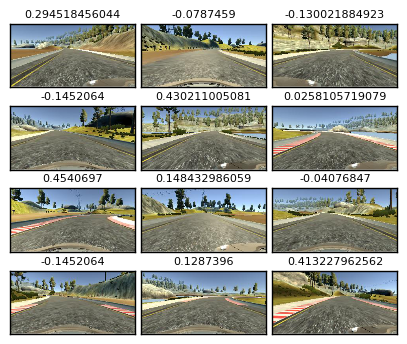

Randomly chosen batch - transformed:


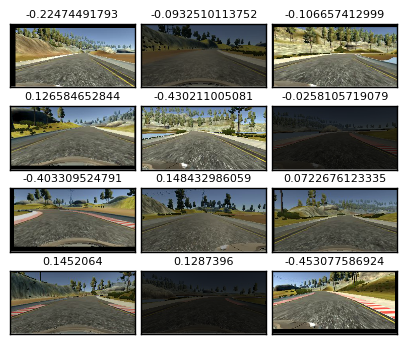

In [5]:
#generate transformations
X_batch, y_batch = generate_synthetic_training_batch(X_train, y_train, batch_size=12)
#review the transformations
display_generator_data(X_batch, y_batch, "Randomly chosen batch - transformed:")

In [3]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D

#NVIDIA model
def cnn_model():
    model = Sequential()
    #CROP: Input = 160x320x3, Output = 66x200x3
    model.add(Cropping2D(cropping=((70, 24), (60, 60)), input_shape=(160, 320, 3)))
    #NORMALIZE: Input = 66x200x3, Output = 66x200x3
    model.add(Lambda(lambda x: x / 255))
    ## LAYER 1 ##
    #CONVOLUTIONAL: Input = 66x200x3, Output = 31x98x24
    #filter: 5x5, input depth: 3, output depth: 24
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode='valid', activation="relu"))
    ## LAYER 2 ##
    #CONVOLUTIONAL: Input = 31x98x24, Output = 14x47x36
    #filter: 5x5, input depth: 24, output depth: 36
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode='valid', activation="relu"))
    ## LAYER 3 ##
    #CONVOLUTIONAL: Input = 14x47x36, Output = 5x22x48
    #filter: 5x5, input depth: 36, output depth: 48
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode='valid', activation="relu"))
    ## LAYER 4 ##
    #CONVOLUTIONAL: Input = 5x22x48, Output = 3x20x64
    #filter: 3x3, input depth: 48, output depth: 64
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode='valid', activation="relu"))
    ## LAYER 5 ##
    #CONVOLUTIONAL: Input = 3x20x64, Output = 1x18x64
    #filter: 3x3, input depth: 64, output depth: 64
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode='valid', activation="relu"))
    #FLATTEN INPUT WHILE RETAINING BATCH: Input = 1x18x64, Output = 1152x1
    model.add(Flatten())
    ## LAYER 6 ##
    #FULLY-CONNECTED: Input = 1152, Output = 100
    model.add(Dense(100, activation='relu'))
    ## LAYER 7 ##
    #FULLY-CONNECTED: Input = 100, Output = 50
    model.add(Dense(50, activation='relu'))
    #REGULARIZATION: Dropout
    model.add(Dropout(0.5))
    ## LAYER 8 ##
    #FULLY-CONNECTED: Input = 50, Output = 10
    model.add(Dense(10, activation='relu'))
    #REGULARIZATION: Dropout
    model.add(Dropout(0.5))
    ## OUTPUT LAYER ##
    #FULLY-CONNECTED: Input = 10, Output = 1
    model.add(Dense(1))
    return model
    
model = cnn_model()    
model.compile(loss="mse", optimizer="adam")
model.summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 66, 200, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 66, 200, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________

In [4]:
#Process validation data
X_validation_temp = []

#load images
for image_path in X_validation:
    image = mpimg.imread(image_path)
    X_validation_temp.append(image)
    
X_validation = np.array(X_validation_temp)    

## VALIDATION ##
#convert to float
X_validation = X_validation.astype(np.float)
#normalize
X_validation /= 255.0

## CROP ##
def crop_validation(X):
    return X[:, 70:136, 60:260]

print("Pre-crop shape:", X_validation.shape)
X_validation = crop_validation(X_validation)
print("Post-crop shape:", X_validation.shape)



Pre-crop shape: (2205, 160, 320, 3)
Post-crop shape: (2205, 66, 200, 3)


In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    samples_per_epoch=len(X_train), nb_epoch=nb_epoch)



In [ ]:
from sklearn.utils import shuffle
#shuffle data
X_train, y_train = shuffle(X_train, y_train)

Input shape: (160, 320, 3)
Output shape: (66, 200, 3)


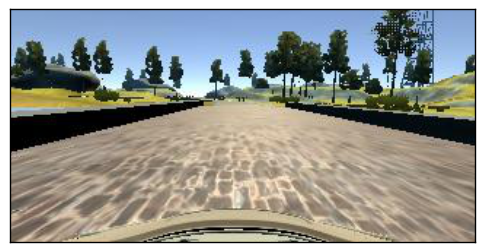

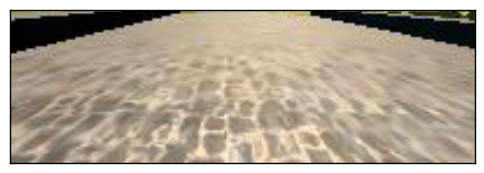

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from keras.models import Sequential, Model
from keras.layers import Cropping2D
from keras import backend as K

def crop(image):
    return image[70:136, 60:260]

# import and transform the image
original_image = mpimg.imread('IMG/center_2016_12_01_13_30_48_287.jpg')

transformed_image_array = original_image[None, :, :, :]

# set up cropping2D layer
model = Sequential()
#model.add(Cropping2D(cropping=((70, 24), (60, 60)), input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((65, 29), (60, 60)), input_shape=(160, 320, 3)))

# create function that will input an image and output the cropped image
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[0].output])

print("Input shape:", original_image.shape)



# transform an image
layer_output = get_layer_output([transformed_image_array])[0]

plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(original_image)

output_image = np.uint8(layer_output[0])

plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(output_image)

print("Output shape:", output_image.shape)

#plt.figure()
#plt.xticks([])
#plt.yticks([])
#plt.imshow(output_image)

#output_image = crop(original_image)

#print("Output2 shape:", output_image.shape)

#cv2.imwrite('cropped_image.jpg', layer_output[0])
#cv2.imwrite('original_image.jpg', original_image)

In [16]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Lambda
from keras import backend as K
import cv2

# import and transform the image
original_image = mpimg.imread('IMG/center_2016_12_01_13_30_48_287.jpg')

transformed_image_array = original_image[None, :, :, :]

# set up lambda layer
model = Sequential()
model.add(Lambda(lambda x: (x - 127.5) / 255, 
    input_shape=transformed_image_array.shape[1:]))

# create function that will input an image and output the cropped image
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[0].output])

# transform an image
layer_output = get_layer_output([transformed_image_array])[0][0]

# show results
print('\n')
print('original image dimensions', original_image.shape)
print('lambda layer dimensions', layer_output.shape)
print('\n')
print('pixel in original image ', original_image[0][0])
print('pixel in output ', layer_output[0][0])



original image dimensions (160, 320, 3)
lambda layer dimensions (160, 320, 3)


pixel in original image  [130 163 208]
pixel in output  [ 0.00980392  0.13921569  0.31568629]


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)